## 3D reconstructions of liver, heart, and a brain subregion that vary along the left-right axis

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import umap
import os
import scipy.sparse
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load 3d spatial locations
n_slice = 5
res_path = "Results/INSPIRE_3d_reconstruction"
adata_st_list = []
for i in range(n_slice):
    adata = sc.read_h5ad(res_path + "/adata_3d_spatial_"+str(i)+".h5ad")
    adata_st_list.append(adata)

In [3]:
rgb_10 = [i for i in get_cmap('Set3').colors]
rgb_20 = [i for i in get_cmap('tab20').colors]
rgb_20b = [i for i in get_cmap('tab20b').colors]
rgb_dark2 = [i for i in get_cmap('Dark2').colors]
rgb_pst1 = [i for i in get_cmap('Pastel1').colors]
rgb_acc = [i for i in get_cmap('Accent').colors]
rgb2hex_10 = [mpl.colors.rgb2hex(color) for color in rgb_10]
rgb2hex_20 = [mpl.colors.rgb2hex(color) for color in rgb_20]
rgb2hex_20b = [mpl.colors.rgb2hex(color) for color in rgb_20b]
rgb2hex_20b_new = [rgb2hex_20b[i] for i in [0, 3, 4, 7, 8, 11, 12, 15, 16, 19]]
rgb2hex_dark2 = [mpl.colors.rgb2hex(color) for color in rgb_dark2]
rgb2hex_pst1 = [mpl.colors.rgb2hex(color) for color in rgb_pst1]
rgb2hex_acc = [mpl.colors.rgb2hex(color) for color in rgb_acc]
rgb2hex = rgb2hex_20 + rgb2hex_20b_new + rgb2hex_dark2 + rgb2hex_pst1 + rgb2hex_acc

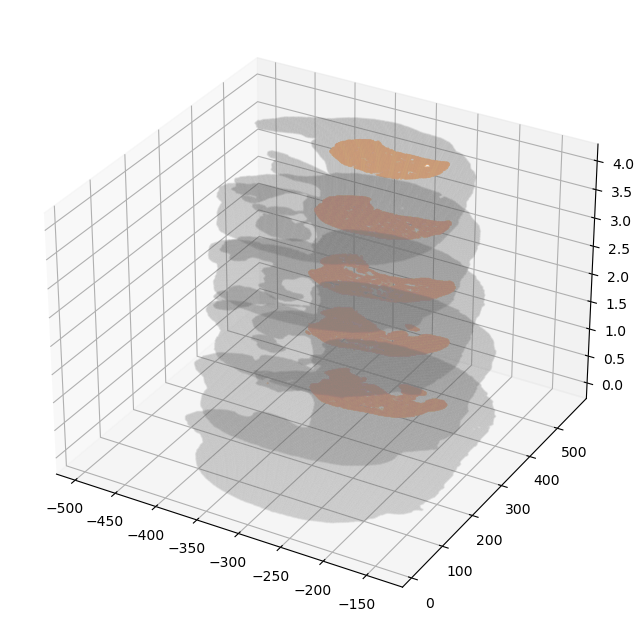

In [4]:
louvain_id = "3"

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

size = .05

# draw slices
for i_slice in range(n_slice):
    ax.scatter(adata_st_list[i_slice].obsm["spatial_3d"][:,0], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,1], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,2], s=0.03, c="gray", alpha=0.1)

# draw regions
for i_slice in range(n_slice):
    ad_tmp = adata_st_list[i_slice][adata_st_list[i_slice].obs["louvain"].values.astype(str) == louvain_id, :]
    ax.scatter(ad_tmp.obsm["spatial_3d"][:,0], 
               ad_tmp.obsm["spatial_3d"][:,1], 
               ad_tmp.obsm["spatial_3d"][:,2], s=size, c=rgb2hex[3], alpha=1)

plt.show()

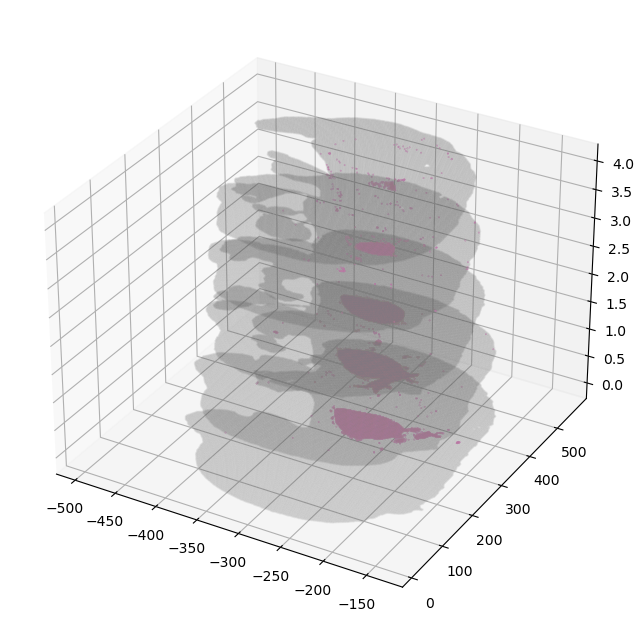

In [5]:
louvain_id = "12"

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

size = .05

# draw slices
for i_slice in range(n_slice):
    ax.scatter(adata_st_list[i_slice].obsm["spatial_3d"][:,0], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,1], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,2], s=0.03, c="gray", alpha=0.1)

# draw regions
for i_slice in range(n_slice):
    ad_tmp = adata_st_list[i_slice][adata_st_list[i_slice].obs["louvain"].values.astype(str) == louvain_id, :]
    ax.scatter(ad_tmp.obsm["spatial_3d"][:,0], 
               ad_tmp.obsm["spatial_3d"][:,1], 
               ad_tmp.obsm["spatial_3d"][:,2], s=size, c=rgb2hex[12], alpha=1)

plt.show()

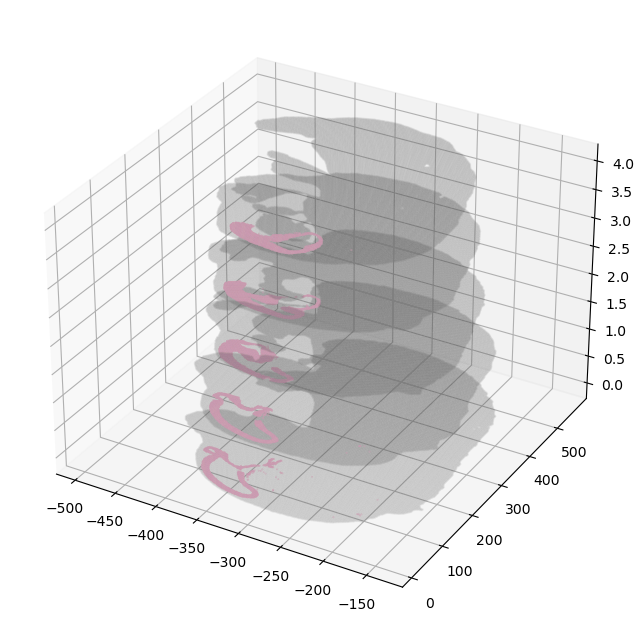

In [6]:
louvain_id = "13"

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

size = .05

# draw slices
for i_slice in range(n_slice):
    ax.scatter(adata_st_list[i_slice].obsm["spatial_3d"][:,0], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,1], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,2], s=0.03, c="gray", alpha=0.1)

# draw regions
for i_slice in range(n_slice):
    ad_tmp = adata_st_list[i_slice][adata_st_list[i_slice].obs["anno"].values.astype(str) == louvain_id, :]
    ax.scatter(ad_tmp.obsm["spatial_3d"][:,0], 
               ad_tmp.obsm["spatial_3d"][:,1], 
               ad_tmp.obsm["spatial_3d"][:,2], s=size, c=rgb2hex[13], alpha=1)

plt.show()